# Chapter 18: Pandas for Time Series Data

If you are considering investing money in the stock market, it is useful to analyze its historical price, as this gives clues into what is possible for future price changes.  Now you can find stock market plots online, but they are usually pretty limiting in what you can see, and you may want to plot something different from what is available.  The natural solution is to find the raw data online and to use Python to plot exactly the aspects of the data in which you are interested.  This chapter provides an example of doing just that, and it shows the ease by which you can make quite sophisticated plots of stock price changes.  By showing you what is possible with a few lines of code, my hope is that you'll take it to the next level in analyzing and plotting your own data, be it stock prices or any other time series data.

This chapter primarily uses the **Pandas** toolbox to read in and organize data in series form along with Matplotlib for various plotting functions.  Only very basic functionality will be shown, but it is easy to modify and extend the ideas as well as follow other online examples.  For a quick but intense introduction to Pandas, see: https://pandas.pydata.org/docs/user_guide/10min.html.   

Note that this page is a Jupyter notebook which means you can interactively run the Python commands and make modifications.  I recommend editing it within Visual Studio Code and optionally making a copy that you can use to experiment with modifying portions of the code.  

___
## 1. Set up Python

You'll need Python and Visual Studio Code installed, see [Chapter 2](Chapter_02_Installation_and_IDE.md).  Then set these up as follows:

### In a terminal window:
Activate your virtual environment if you have one, see [Chapter 12](Chapter_12_Virtual_Environments.md).  Then install the following toolboxes:
```
$ python -m pip install pandas matplotlib jupyter
```
### In Visual Studio Code:
Make sure the *Python extension* is installed from the marketplace.  (If you open a Python file and the extension is not installed, then VSCode will prompt you to install it.)

Make sure you have selected your Python virtual environment that you want to use for the `python_intro` folder or workspace.  This is done by pressing `ctrl-shift-p`.  Then type `python: select interpreter`.  If your virtual environment is one of the options, select it, otherwise provide the path to the `python.exe` executable within your Python virtual environment.

Install the VSCode Jupyter extension available in the marketplace.  This will enable you to interactively run the commands in this document.  Opening this file will prompt you to install the Jupyter extension if it is not already installed.

Next you are ready to load the necessary libraries.  Run the next block of code:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

These `import` commands load the 3 packages we need and will enable us to use `pd` to refer to pandas, `np` for numpy and `plt` for matplotlib's pyplot.
___
## 2. Read and Organize Stockmarket Values

A convenient and relatively large dataset is the S&P 500 stock index named `SPX`.  Download monthly historical data on for `SPX` from this website: https://stooq.com/q/d/?s=%5Espx&c=0&i=m, and copy the file `^spx_m.csv` to the `Data` folder within the current folder. If you open this file in a text editor you will see the top few lines contain a header line and data with elements separated by commas.  The `.csv` stands for *comma separated values*:
```
Date,Open,High,Low,Close,Volume
1789-05-31,0.51,0.51,0.51,0.51
1789-06-30,0.51,0.51,0.51,0.51
1789-07-31,0.5,0.5,0.5,0.5
1789-08-31,0.5,0.51,0.5,0.51
...
```
Let's load this using `pandas` and take a look at the contents:

In [2]:
spx = pd.read_csv('Data/^spx_m.csv')
spx

,Date,Open,High,Low,Close,Volume
0,1789-05-31,0.51,0.51,0.51,0.51,NaN
1,1789-06-30,0.51,0.51,0.51,0.51,NaN
2,1789-07-31,0.50,0.50,0.50,0.50,NaN
3,1789-08-31,0.50,0.51,0.50,0.51,NaN
4,1789-09-30,0.51,0.51,0.50,0.51,NaN
...,...,...,...,...,...,...
2789,2022-02-28,4519.57,4595.31,4114.65,4373.94,5.074627e+10
2790,2022-03-31,4363.14,4637.30,4157.87,4530.41,6.190108e+10
2791,2022-04-30,4540.32,4593.45,4124.28,4131.93,4.920787e+10
2792,2022-05-31,4130.61,4307.66,3810.32,4132.15,5.529092e+10


Pandas reads the data into a `DataFrame` object, a special data type defined by `pandas`.  Typing `spx` on a new line will display this `DataFrame` object in a convenient summarized form with column headers and the row indices for the first 5 rows and last 5 rows.  The `NaN` (meaning Not-a-Number) occurs because all the rows before 1950 are missing the Volume element.  We can extract any of the rows using `.loc[index]` like this:

In [3]:
spx.loc[2793]

Date         2022-06-30
Open            4149.78
High            4177.51
Low             3636.94
Close           3674.84
Volume    31541419945.0
Name: 2793, dtype: object

Or select a subset of rows using slicing (that is inclusive of first and last element):

In [4]:
spx.loc[2000:2005]

,Date,Open,High,Low,Close,Volume
2000,1956-05-31,48.16,48.51,44.10,45.20,29561112.0
2001,1956-06-30,45.58,47.13,45.14,46.97,20655557.0
2002,1956-07-31,46.93,49.48,46.93,49.39,25361108.0
2003,1956-08-31,49.62,49.64,46.94,47.51,24694445.0
2004,1956-09-30,47.89,48.10,45.35,45.35,20677776.0
2005,1956-10-31,44.70,47.00,44.70,45.58,22388889.0


Or specify a single element by giving the row index and column name like this:

In [5]:
spx.loc[2000,'Date']

'1956-05-31'

Each column is a `Series` object and can be selected like this:

In [6]:
spx['Close']

0          0.51
1          0.51
2          0.50
3          0.51
4          0.51
         ...   
2789    4373.94
2790    4530.41
2791    4131.93
2792    4132.15
2793    3674.84
Name: Close, Length: 2794, dtype: float64

Let's plot the monthly closing price over the whole time history:

Text(0.5, 1.0, 'SPX ($)')

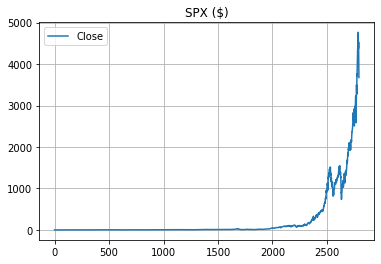

In [7]:
fig = plt.figure()
spx['Close'].plot()
plt.legend()
plt.grid()
plt.title('SPX ($)')

We can see the historical price change, but using a month index for the abscissa is pretty awkward.  Really, we would like the date along the abscissa, so let's examine the date column: 

In [8]:
spx['Date']

0       1789-05-31
1       1789-06-30
2       1789-07-31
3       1789-08-31
4       1789-09-30
           ...    
2789    2022-02-28
2790    2022-03-31
2791    2022-04-30
2792    2022-05-31
2793    2022-06-30
Name: Date, Length: 2794, dtype: object

Notice that even though this series contains dates, is of type `object`, which means it could be anything.  We can convert it to a date format that `pandas` recognizes and can use for indexing and plotting with dates correctly.

In [9]:
spx['Date'] = pd.to_datetime(spx['Date'])
spx['Date']

0      1789-05-31
1      1789-06-30
2      1789-07-31
3      1789-08-31
4      1789-09-30
          ...    
2789   2022-02-28
2790   2022-03-31
2791   2022-04-30
2792   2022-05-31
2793   2022-06-30
Name: Date, Length: 2794, dtype: datetime64[ns]

Notice that the type is now: `datetime64[ns]`, which Pandas knows how to manage as a date.  Finally, let's make the `Date` column be the index for the array, so that our plots can truly be functions of the date:

In [10]:
spx.set_index('Date',inplace=True)  # Without doing inplace, a copy is made and spx is not updated
spx

,Open,High,Low,Close,Volume
Date,,,,,
1789-05-31,0.51,0.51,0.51,0.51,NaN
1789-06-30,0.51,0.51,0.51,0.51,NaN
1789-07-31,0.50,0.50,0.50,0.50,NaN
1789-08-31,0.50,0.51,0.50,0.51,NaN
1789-09-30,0.51,0.51,0.50,0.51,NaN
...,...,...,...,...,...
2022-02-28,4519.57,4595.31,4114.65,4373.94,5.074627e+10
2022-03-31,4363.14,4637.30,4157.87,4530.41,6.190108e+10
2022-04-30,4540.32,4593.45,4124.28,4131.93,4.920787e+10


Notice that `Date` is now the index column.  Let's select some rows using the date index.  For example, we can select all rows within year 2000 with:

In [11]:
spx.loc['2000']

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-31,1469.25,1478.00,1350.14,1394.46,1.194133e+10
2000-02-29,1394.46,1444.55,1325.07,1366.42,1.161778e+10
2000-03-31,1366.42,1552.87,1346.62,1498.58,1.453122e+10
2000-04-30,1498.58,1527.19,1339.40,1452.43,1.117026e+10
2000-05-31,1452.43,1481.51,1361.09,1420.60,1.105461e+10
2000-06-30,1420.60,1488.93,1420.60,1454.60,1.207683e+10
2000-07-31,1454.60,1517.32,1413.89,1430.83,1.060506e+10
2000-08-31,1430.83,1525.21,1425.43,1517.68,1.131317e+10
2000-09-30,1517.68,1530.09,1419.44,1436.51,1.157683e+10


___
## 3. Plotting Time Series

Now that our data are indexed by date, let's redo the stock price plot from earlier with exactly the same code:

Text(0.5, 1.0, 'SPX ($)')

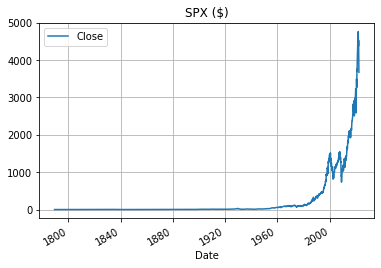

In [12]:
fig = plt.figure()
spx['Close'].plot()
plt.legend()
plt.grid()
plt.title('SPX ($)')

Like magic, the abscissa contains the date -- all because we set the index to be `spx['Date']` and made sure this date column is a date type.  

Now it looks like most of the absolute gains occur since 2000, but we can use log scaling on the y axis to see relative gains (all without adjustment for inflation):

Text(0.5, 1.0, 'SPX ($)')

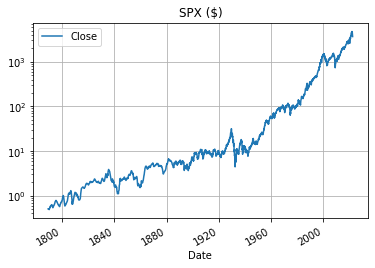

In [13]:
fig = plt.figure()
spx['Close'].plot(logy=True)
plt.legend()
plt.grid()
plt.title('SPX ($)')

Let's extract all the data from the 1980's.  We'll use the colon slice operation, which for `pandas` indexing is inclusive of the first *and last* element, unlike for lists and arrays.  

In [14]:
spx80s = spx['1980-01-01':'1989-12-31']
spx80s


,Open,High,Low,Close,Volume
Date,,,,,
1980-01-31,107.94,117.17,103.26,114.16,6.434667e+08
1980-02-29,114.16,120.22,111.33,113.66,5.314056e+08
1980-03-31,113.66,114.34,94.23,102.09,4.869167e+08
1980-04-30,102.09,106.79,98.95,106.29,3.745222e+08
1980-05-31,106.29,112.72,103.50,111.24,4.249556e+08
...,...,...,...,...,...
1989-08-31,346.08,352.73,339.00,351.45,2.193944e+09
1989-09-30,351.45,354.13,341.37,349.15,1.686122e+09
1989-10-31,349.15,360.44,327.12,340.36,2.229261e+09


Because of this inclusive indexing, we could make the same selection as follows:

In [15]:
spx['1980':'1989']

,Open,High,Low,Close,Volume
Date,,,,,
1980-01-31,107.94,117.17,103.26,114.16,6.434667e+08
1980-02-29,114.16,120.22,111.33,113.66,5.314056e+08
1980-03-31,113.66,114.34,94.23,102.09,4.869167e+08
1980-04-30,102.09,106.79,98.95,106.29,3.745222e+08
1980-05-31,106.29,112.72,103.50,111.24,4.249556e+08
...,...,...,...,...,...
1989-08-31,346.08,352.73,339.00,351.45,2.193944e+09
1989-09-30,351.45,354.13,341.37,349.15,1.686122e+09
1989-10-31,349.15,360.44,327.12,340.36,2.229261e+09


Now let's plot the month gains and losses for this time period as bars  Here's a simple way to do that:

Text(0.5, 1.0, '1980s SPX Monthly Gains and Losses ($)')

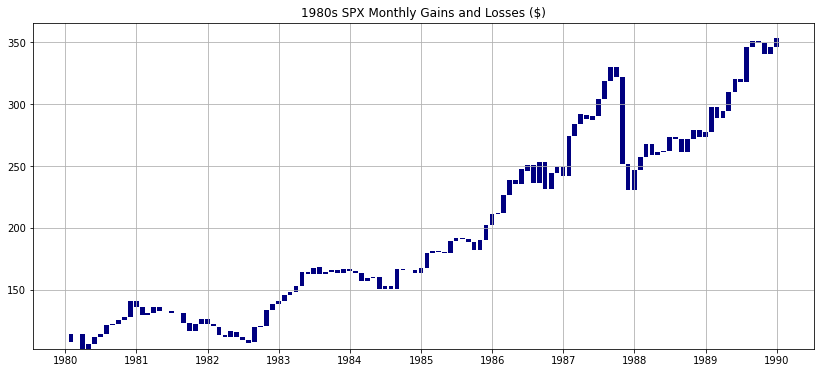

In [16]:
fig = plt.figure(figsize=(14,6))
monthly_gain = np.abs(spx80s['Close']-spx80s['Open'])       # bar height is absolute difference
monthly_bottom = np.minimum(spx80s['Open'],spx80s['Close']) # bar bottom is minimum of open and close
plt.bar( spx80s.index, monthly_gain, bottom=monthly_bottom, width=24,color=(0,0,0.5))  # bar width is 24 days
plt.grid()
plt.title('1980s SPX Monthly Gains and Losses ($)')

It is a bit more informative if we plot gains and losses in different colors.  We can do that as follows:

Text(0.5, 1.0, '1980s SPX Monthly Gains and Losses ($)')

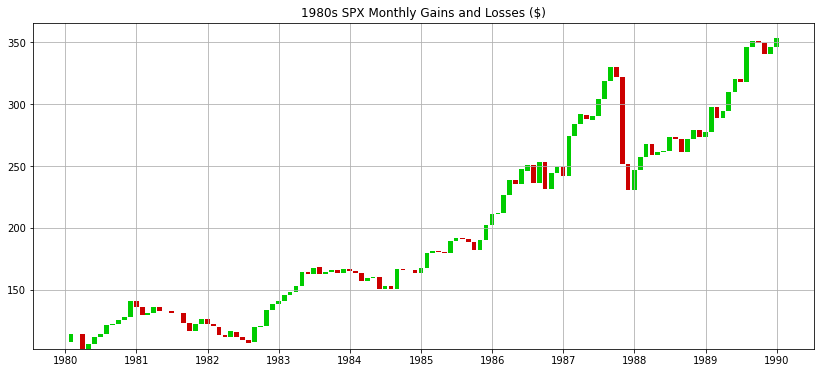

In [17]:
fig = plt.figure(figsize=(14,6))
monthly_gain = spx80s['Close']-spx80s['Open']
pos = monthly_gain>0        # An array with True for gains and False for loses
neg = np.logical_not(pos)   # The logical not of pos
monthly_bottom = np.minimum(spx80s['Open'],spx80s['Close'])
plt.bar( spx80s.index[pos], monthly_gain[pos], bottom=monthly_bottom[pos], width=24,color=(0,.8,0))
plt.bar( spx80s.index[neg], -monthly_gain[neg], bottom=monthly_bottom[neg], width=24,color=(.8,0,0))
plt.grid()
plt.title('1980s SPX Monthly Gains and Losses ($)')

Another way to look at the data is whether or not the current closing price is the highest closing price to far, or if it is lower than a previous close.  Let's do this analysis for all months since 1920.

In [18]:
# Create new DataFrame from 1920 and on:
spx20 = spx['1919-12-31'::]
# Add two columns to it that initially are just copies of the closing price:
spx20 = pd.concat( [spx20, spx20['Close'].copy().rename('New High Close'), spx20['Close'].copy().rename('Lower Close')], axis=1)
# Now find which elements are new high closes
new_high = []
high_so_far=0
for close_price in spx20['Close']:
    if close_price > high_so_far:
        new_high.append(True)
        high_so_far = close_price
    else:
        new_high.append(False)
new_high = np.array(new_high)
spx20.loc[np.logical_not(new_high),'New High Close'] = np.nan 
spx20.loc[new_high,'Lower Close'] = np.nan 

Now we're ready to plot the data

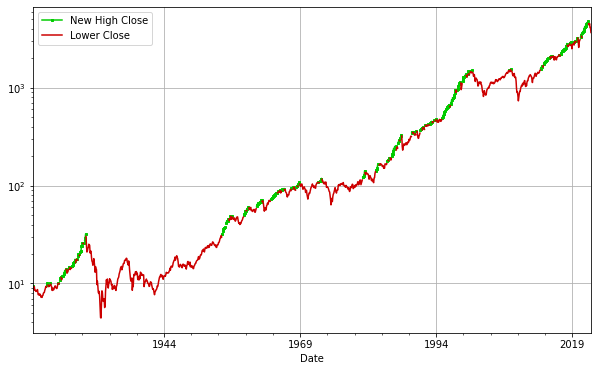

In [19]:
fig = plt.figure(figsize=(10,6))
spx20['New High Close'].plot(logy=True, marker='s', markersize=2,  color=(0,0.8,0))
spx20['Lower Close'].plot(logy=True, color=(0.8,0,0))
plt.legend()
plt.grid()

Notice the grid lines are not very convenient for comparing decades.  Let's create a series of dates to mark the start of each decade.  The frequency is every 120 months at the start of the month.

In [20]:
date_list = pd.date_range(start='1920', periods=11, freq=pd.offsets.MonthBegin(120))
date_list

DatetimeIndex(['1920-01-01', '1930-01-01', '1940-01-01', '1950-01-01',
               '1960-01-01', '1970-01-01', '1980-01-01', '1990-01-01',
               '2000-01-01', '2010-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='120MS')

Now lets redo the plot with the new grid

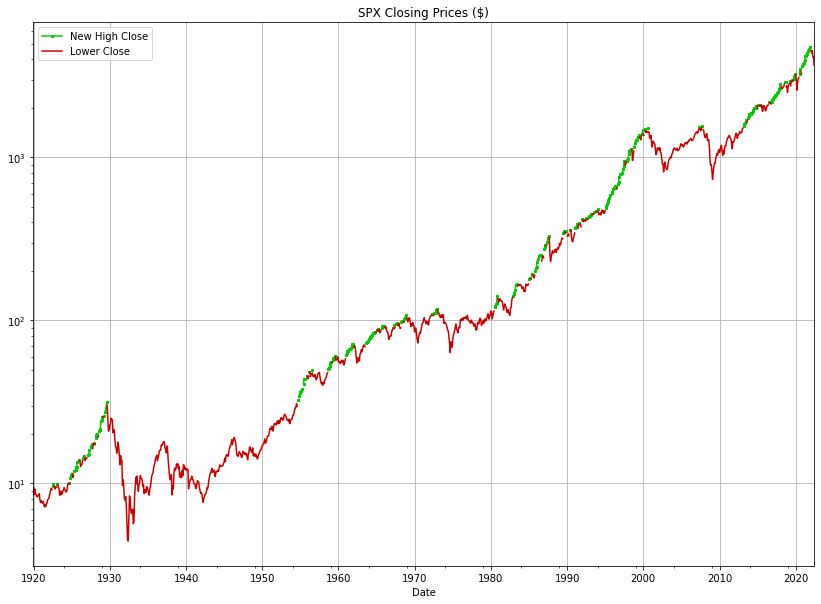

In [21]:
fig = plt.figure(figsize=(14,10))
spx20['New High Close'].plot(logy=True, marker='s', markersize=2,  color=(0,0.8,0))
spx20['Lower Close'].plot(logy=True, color=(0.8,0,0))
plt.legend()
plt.xticks(date_list, date_list.year) # This sets the vertical grid lines and labels
plt.title('SPX Closing Prices ($)')
plt.grid()

It is interesting to compare the stock index performance over various decades, and also to observe extended periods in which the price remains below the previous high.  Note also that inflation is not accounted for, so real gains are lower than shown here.

___
### [Outline](README.md)